___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://dinhanhthi.com/img/post/ML/random-forest-decision-tree/r2.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://dinhanhthi.com/img/post/ML/random-forest-decision-tree/r2.jpg</p>

### <font color= #2E9AFE> Tema: Modelos basados en Árboles</font>

Un árbol de decisión es un conjunto de sentencias de la forma: si... entonces...

Estas sentencias dividen los datos en una serie de predictores. 

Estas divisiones de predictores son usadas para estimar la salida del modelo. 

**Ejemplo:** En un problema con dos predictores 'A' y 'B', un conjunto de sentencias de la forma:

Si el predictor 'A' >= 1.7, entonces
- Si el predictor B >=200, entonces la predicción = 1.3
- De otra forma, la predicción = 2.5

Estas sentencias están partiendo los predictores en 3 segmentos donde salidas específicas son definidas. 

**Estructura del árbol**

Toma 3 cosas en cuenta:
- Las variables predictoras (X) que se van a usar y el punto de partición del dataset.
- La profundidad/complejidad del árbol
- La ecuación de predicción en los últimos nodos/hojas del árbol

**Hiperparámetros a ajustar**
- Profundidad del árbol (max_depth)
- Número mínimo de observaciones en cada split(min_samples_split)

**Desventajas**

- Inestabilidad del modelo: Debido a que las particiones se basan en un conjunto de datos, si se generan cambios en el conjunto de datos, esto genera cambios importantes en la estructura del árbol y especialmente en su interpretabilidad.

- Rendimiento predictivo subóptimo. Nuevamente, debido a que las particiones se basan en un conjunto de datos específico, el modelo generalmente no converge con el modelo óptimo global.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

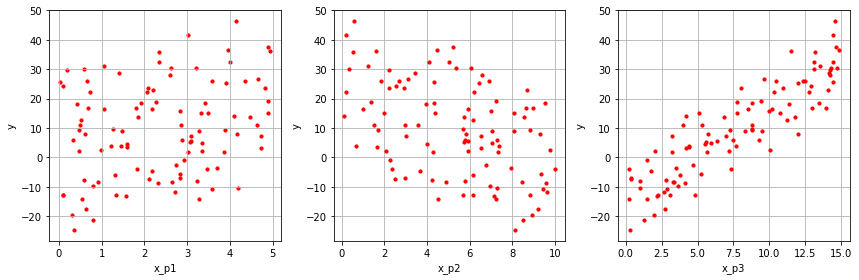

In [2]:
#Generación de datos
rng = np.random.RandomState(0)

# #############################################################################
X = np.zeros((100,3))
X[:,0] = 5 * rng.rand(100, 1)[:,0]
X[:,1] = 10 * rng.rand(100, 1)[:,0]
X[:,2] = 15 * rng.rand(100, 1)[:,0]

y = np.ravel(3*X[:,0]-2*X[:,1]+3*X[:,2]-10)
# Añadimos ruido a la variable dependiente
yrnd = y + 3 * (0.5 - rng.rand(y.shape[0]))


plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(X[:,0], yrnd, c='r', s=10)
plt.xlabel('x_p1')
plt.ylabel('y')
plt.grid()

plt.subplot(132)
plt.scatter(X[:,1], yrnd, c='r', s=10,zorder=2)
plt.xlabel('x_p2')
plt.ylabel('y')
plt.grid()

plt.subplot(133)
plt.scatter(X[:,2], yrnd, c='r', s=10, zorder=2)
plt.xlabel('x_p3')
plt.ylabel('y')
plt.grid()

plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yrnd, test_size=0.20,
                                                    random_state=0,
                                                    shuffle=True)

In [4]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)

#para todos los datos
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, yrnd)
    training_error.append(mse(yrnd, model_1.predict(X)))
    

#para el train-test    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))



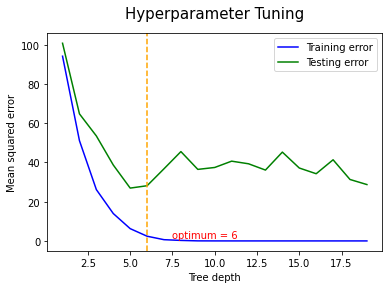

In [5]:
#cómo saber el número óptimo de profundidad?
#Una forma es graficando
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=6, color='orange', linestyle='--')
plt.annotate('optimum = 6', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [6]:
#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 6, 'min_samples_split': 10}


In [7]:
#crear modelo usando parámetros óptimos
new_model = DecisionTreeRegressor(max_depth=6,
                                  min_samples_split=10)
new_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=10)

In [8]:
from sklearn.metrics import r2_score
yhat = new_model.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score)

R2: 0.8550640453787186


In [9]:
from sklearn.metrics import mean_squared_error
MSE_score = mean_squared_error(y_test,yhat)
print('MSE:', MSE_score)

MSE: 45.964639340970756


In [10]:
#ver importancia de las variables
new_model.feature_importances_

array([0.03036709, 0.10983883, 0.85979408])

[Text(0.5277777777777778, 0.9285714285714286, 'X[2] <= 7.715\nsquared_error = 237.641\nsamples = 80\nvalue = 9.797'),
 Text(0.2777777777777778, 0.7857142857142857, 'X[2] <= 3.156\nsquared_error = 91.399\nsamples = 40\nvalue = -2.229'),
 Text(0.1111111111111111, 0.6428571428571429, 'X[1] <= 4.106\nsquared_error = 45.517\nsamples = 16\nvalue = -10.846'),
 Text(0.05555555555555555, 0.5, 'squared_error = 10.568\nsamples = 5\nvalue = -2.909'),
 Text(0.16666666666666666, 0.5, 'X[1] <= 7.719\nsquared_error = 19.744\nsamples = 11\nvalue = -14.455'),
 Text(0.1111111111111111, 0.35714285714285715, 'squared_error = 4.224\nsamples = 7\nvalue = -12.174'),
 Text(0.2222222222222222, 0.35714285714285715, 'squared_error = 21.87\nsamples = 4\nvalue = -18.446'),
 Text(0.4444444444444444, 0.6428571428571429, 'X[1] <= 6.655\nsquared_error = 39.467\nsamples = 24\nvalue = 3.517'),
 Text(0.3888888888888889, 0.5, 'X[1] <= 3.499\nsquared_error = 15.55\nsamples = 15\nvalue = 6.857'),
 Text(0.3333333333333333, 0.

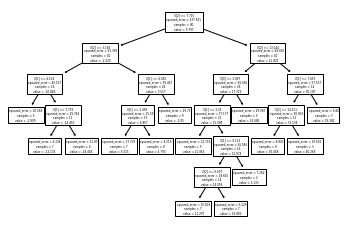

In [11]:
from sklearn import tree
tree.plot_tree(new_model) 

In [14]:
#correr en jupyter notebook:
#pip install graphviz

#correr en la consola de anaconda
#pip install python-graphviz

import graphviz
dot_data = tree.export_graphviz(new_model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("trees_gen/tree_multipredict")

**Ventajas de los árboles de decisión**

- No requiere escalamiento de variables
- Puede  ser usado para datos no lineales
- Fácil de visualizar
- Fácil de interpretar

**Desventajas de los árboles de decisión**

- Es computancionalmente complejo, especialmente al usar cross-validation para ajustar los hiperparámetros
- Un cambio pequeño en los datos puede causar grandes cambios en la estructura del árbol